In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [ ]:
df.describe(include = 'O').T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [ ]:
print(df['gender'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


In [ ]:
print(df['race/ethnicity'].value_counts())

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


In [ ]:
print(df['parental level of education'].value_counts())

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [ ]:
print(df['lunch'].value_counts())

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


In [ ]:
print(df['test preparation course'].value_counts())

test preparation course
none         642
completed    358
Name: count, dtype: int64


In [71]:
df['average marks'].mean()

67.811

In [69]:
masters = df[df['parental level of education'] == "master's degree"]
masters.shape[0]

59

In [70]:
masters['average marks'].mean()

73.57627118644068

In [72]:
edu = df[df['parental level of education'] != "master's degree"]
edu.shape[0]

941

In [73]:
edu['average marks'].mean()

67.44952178533475

### **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.shape

(1000, 8)

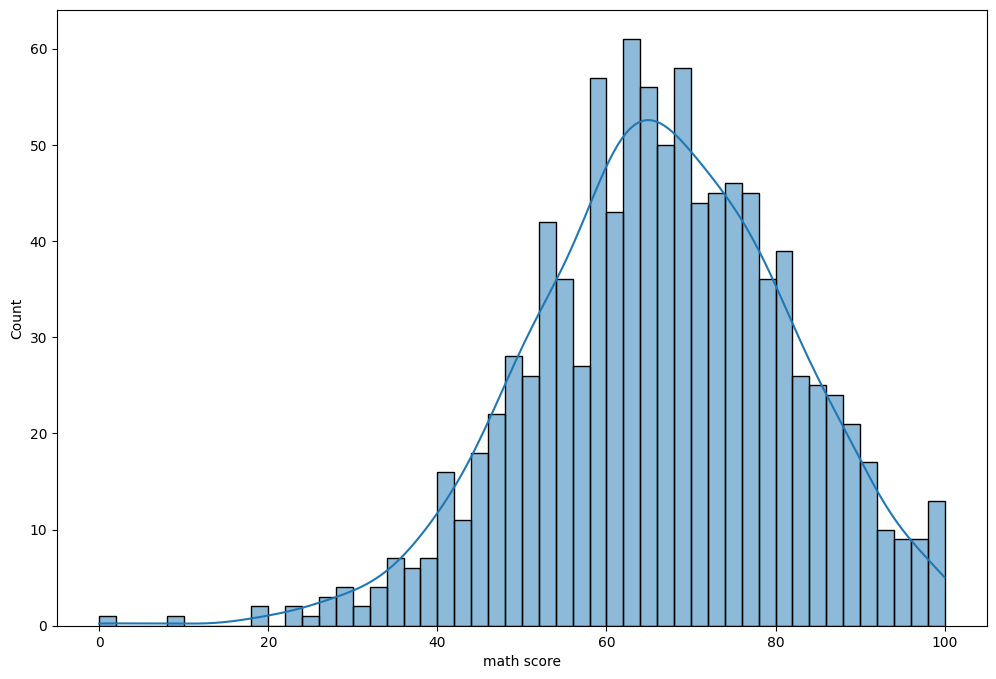

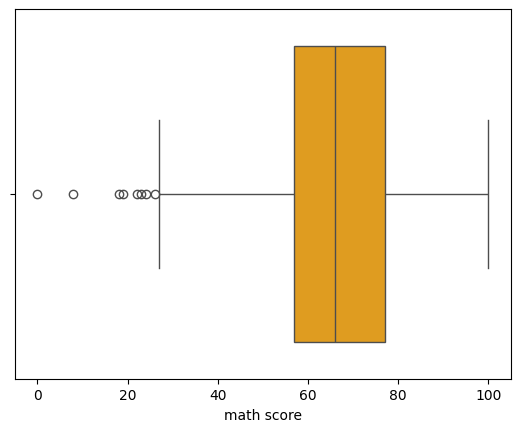

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = 'math score', kde = True, bins = 50)
plt.show()
sns.boxplot(data = df, x = 'math score', color = 'orange')
plt.show()

In [ ]:
df[df['math score'] == 19]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
787,female,group B,some college,standard,none,19,38,32


In [ ]:
df['math score'].value_counts()

,count
math score,
65,36
62,35
69,32
59,32
61,27
...,...
24,1
28,1
33,1


In [ ]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR
print(lower_whisker)
print(upper_whisker)
df['math score'] = np.clip(df['math score'], lower_whisker, upper_whisker)


27.0
107.0


In [ ]:
df['math score'].min()

27

In [ ]:
df[df['math score'] < 27]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


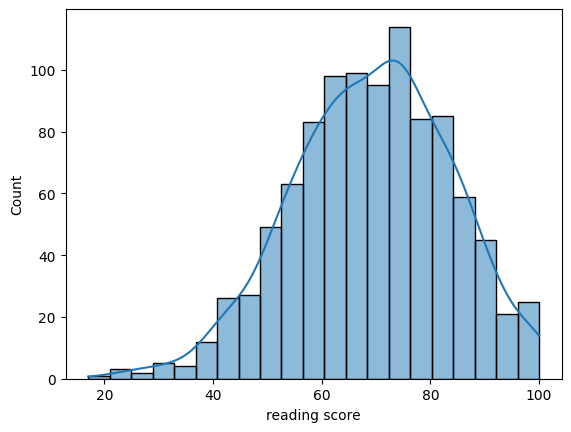

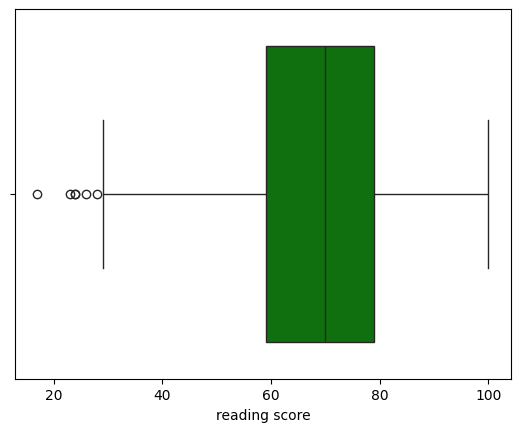

In [ ]:
sns.histplot(data = df, x = 'reading score', kde = True)
plt.show()
sns.boxplot(data = df, x = 'reading score', color = 'green')
plt.show()

In [ ]:
Q11 = df['reading score'].quantile(0.25)
Q31 = df['reading score'].quantile(0.75)
IQR1 = Q31 - Q11
lower_whisker1 = Q11 - 1.5*IQR1
upper_whisker1 = Q31 + 1.5*IQR1
print(lower_whisker1)
print(upper_whisker1)
df['reading score'] = np.clip(df['reading score'], lower_whisker1, upper_whisker1)


29.0
109.0


In [ ]:
df['reading score'].min()

29

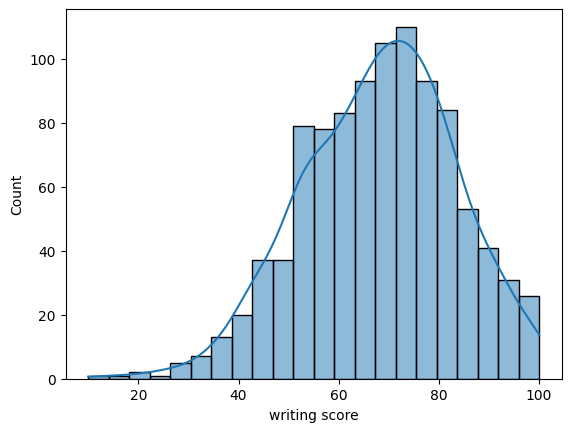

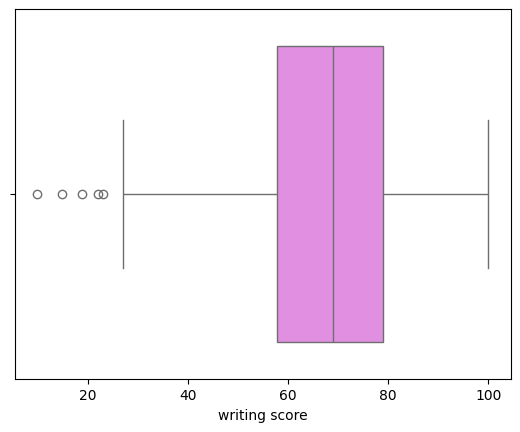

In [ ]:
sns.histplot(data = df, x = 'writing score', kde = True)
plt.show()
sns.boxplot(data = df, x = 'writing score', color = 'violet')
plt.show()

In [ ]:
Q12 = df['writing score'].quantile(0.25)
Q32 = df['writing score'].quantile(0.75)
IQR2 = Q32 - Q12
lower_whisker2 = Q12 - 1.5*IQR2
upper_whisker2 = Q32 + 1.5*IQR2
print(lower_whisker2)
print(upper_whisker2)
df['writing score'] = np.clip(df['writing score'], lower_whisker2, upper_whisker2)


25.875
110.875


In [ ]:
df['writing score'].min()

25.875

In [ ]:
df['average marks'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['average marks'] = df['average marks'].round().astype('int')

In [ ]:
df['average marks']

,average marks
0,73
1,82
2,93
3,49
4,76
...,...
995,94
996,57
997,65
998,74


In [ ]:
df.drop(columns = ['math score', 'reading score', 'writing score'], inplace = True)

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average marks
0,female,group B,bachelor's degree,standard,none,73
1,female,group C,some college,standard,completed,82
2,female,group B,master's degree,standard,none,93
3,male,group A,associate's degree,free/reduced,none,49
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94
996,male,group C,high school,free/reduced,none,57
997,female,group C,high school,free/reduced,completed,65
998,female,group D,some college,standard,completed,74


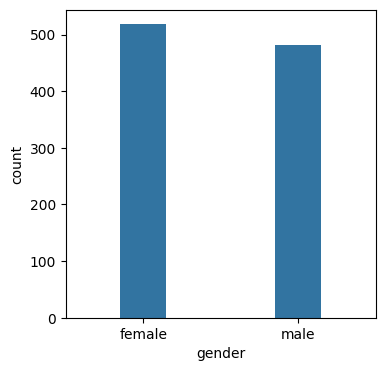

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(data = df, x = 'gender', width = 0.3);

<Axes: xlabel='race/ethnicity', ylabel='count'>

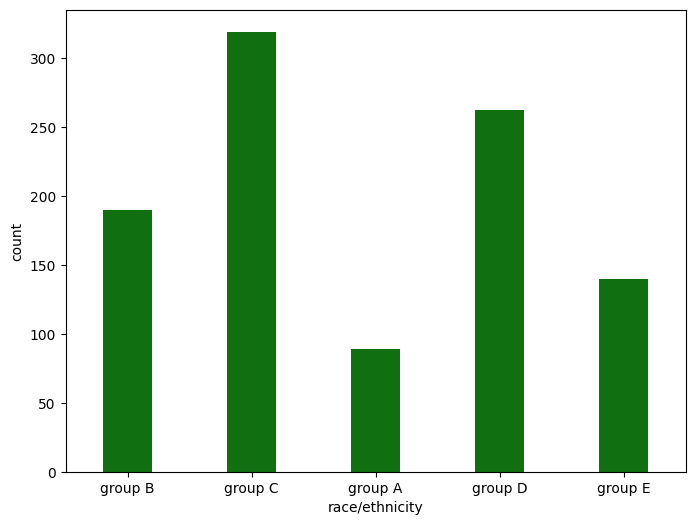

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'race/ethnicity', color = 'g', width = 0.4)

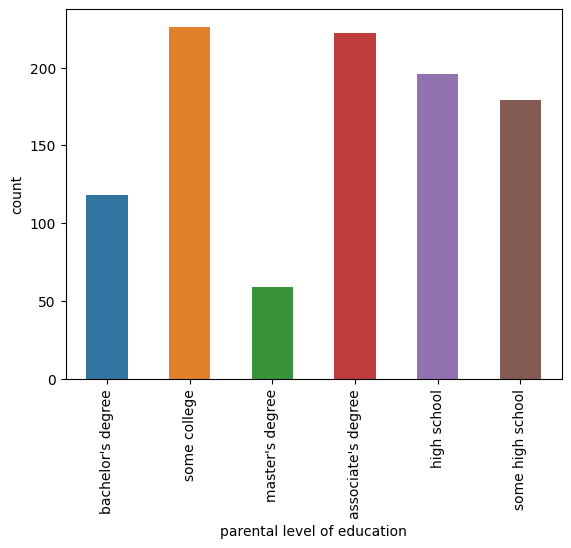

In [ ]:
sns.countplot(data = df, x = 'parental level of education', hue = 'parental level of education', width = 0.5)
plt.xticks(rotation = 90);

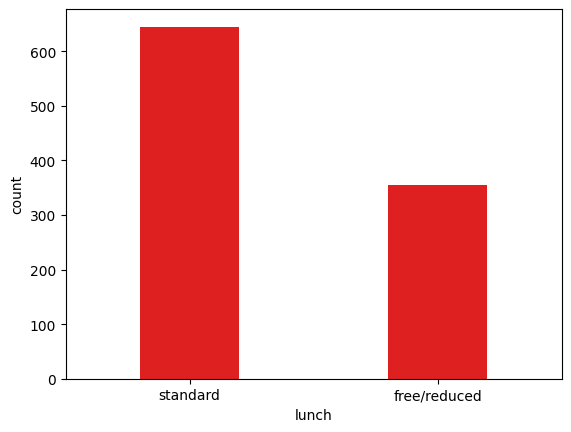

In [ ]:
sns.countplot(data = df, x = 'lunch', color = 'red', width = 0.4);

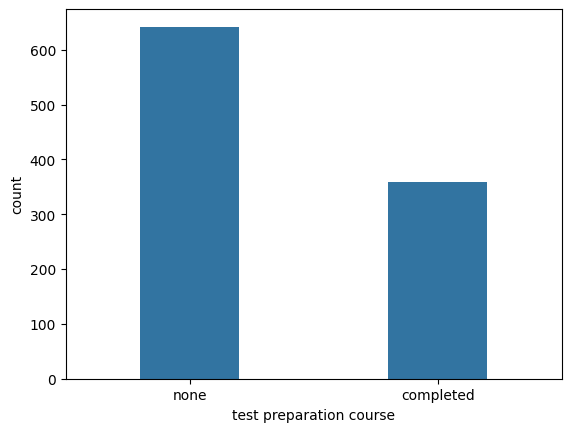

In [ ]:
sns.countplot(data = df, x = 'test preparation course', width = 0.4);

In [ ]:
'''num_cols = ['math score', 'reading score', 'writing score']
corr = df[num_cols].corr()
sns.heatmap(corr, annot = True, cmap = '')
plt.show()'''

"num_cols = ['math score', 'reading score', 'writing score']\ncorr = df[num_cols].corr()\nsns.heatmap(corr, annot = True, cmap = '')\nplt.show()"

In [65]:
df['average marks'].mean()

67.811

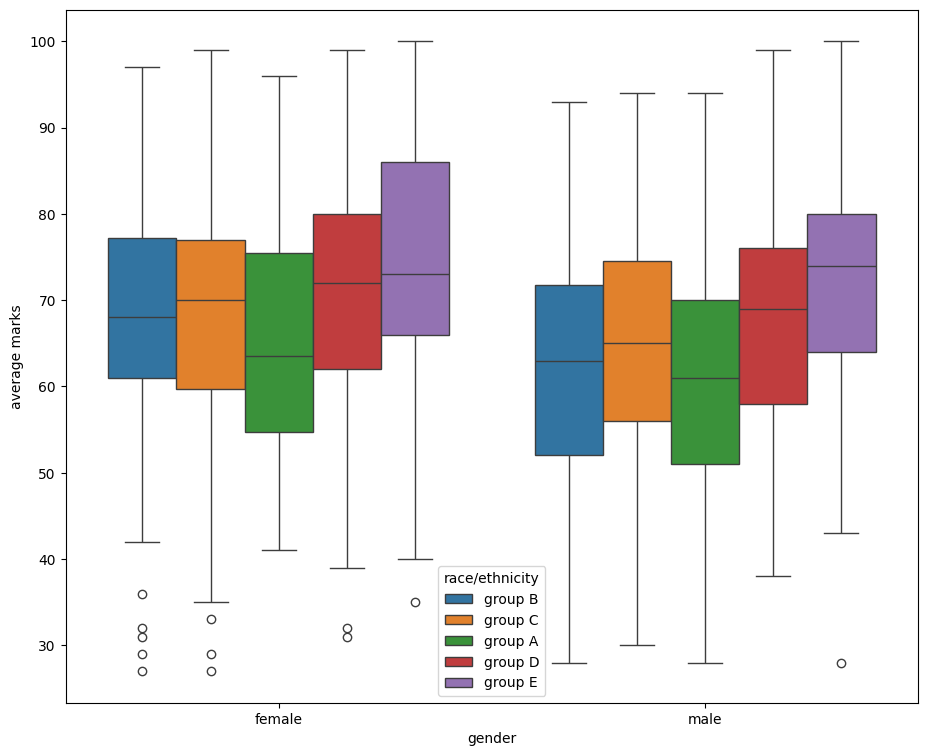

In [ ]:
plt.figure(figsize = (11,9))
sns.boxplot(data = df, x = 'gender', y = 'average marks', hue = 'race/ethnicity');

**Observations**
- Overall Group E people have highest average marks
- Overall Group A people have least average marks
- Irrespective of ethnicity Female are performing better than male
-

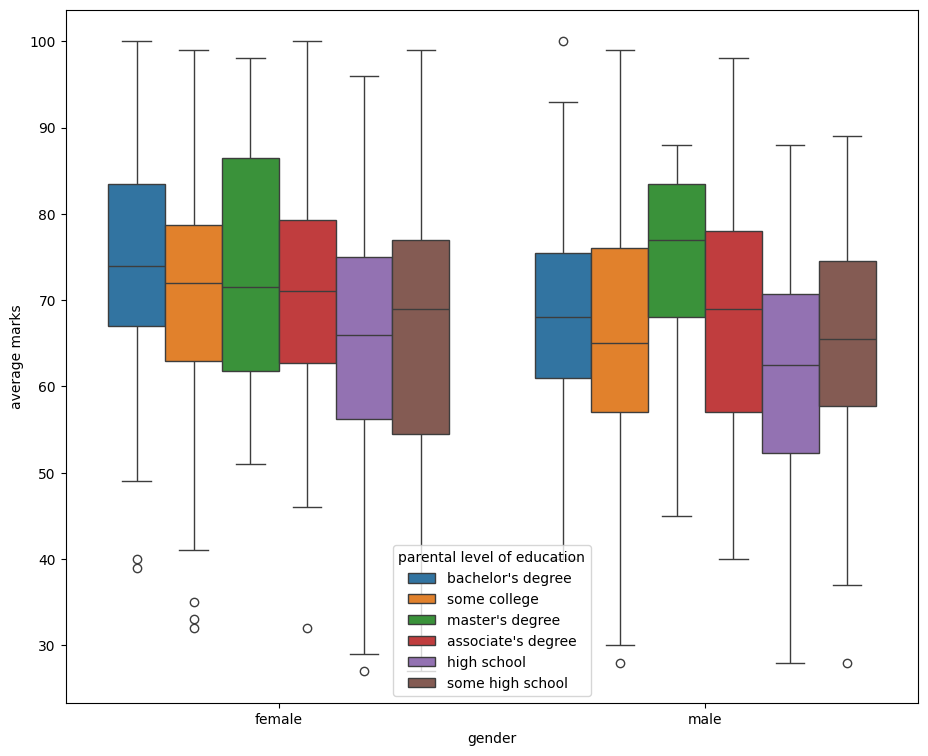

In [60]:
plt.figure(figsize = (11,9))
sns.boxplot(data = df, x = 'gender', y = 'average marks', hue = 'parental level of education');

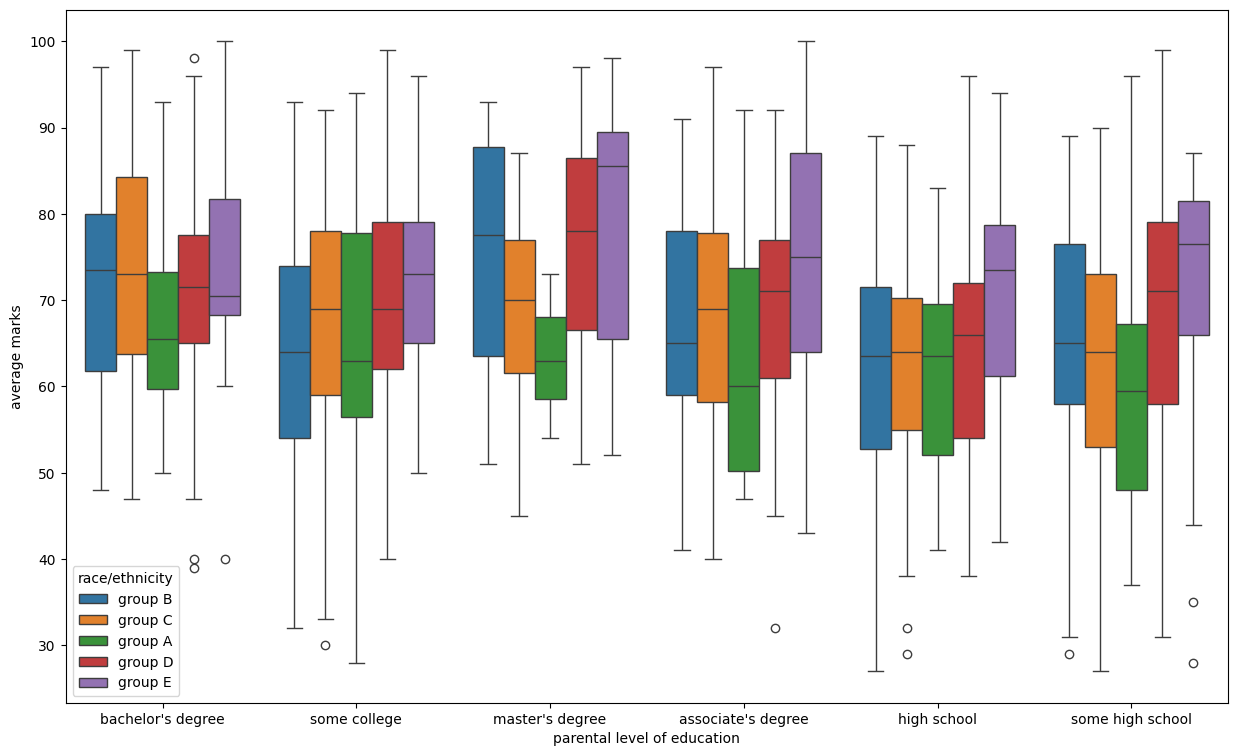

In [62]:
plt.figure(figsize = (15,9))
sns.boxplot(data = df, x = 'parental level of education', y = 'average marks', hue = 'race/ethnicity');

**Observations**
- Group E people irrespective of parent's level of education seem to perform well.
- Group A people, irrespective of parents level of education seem to not perform good.
- Performance of group B people is highly dependent on parents level of education.

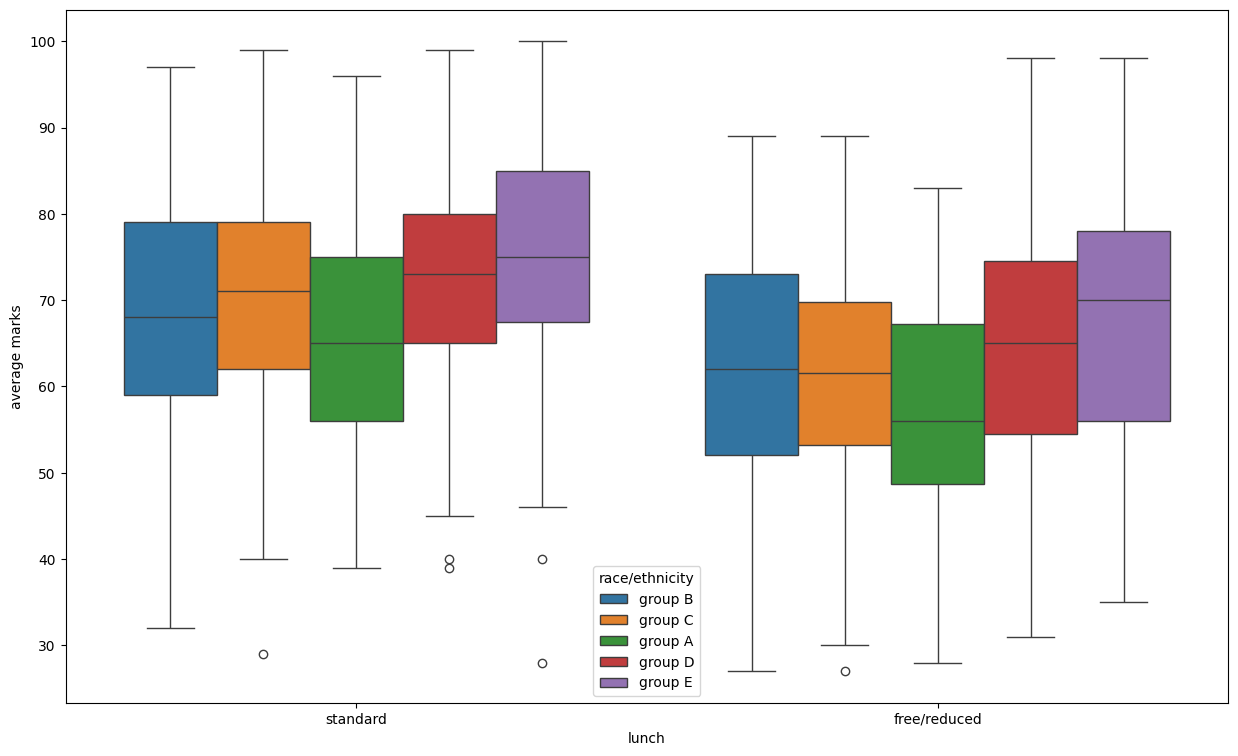

In [63]:
plt.figure(figsize = (15,9))
sns.boxplot(data = df, x = 'lunch', y = 'average marks', hue = 'race/ethnicity'); # Can exclude this relationship

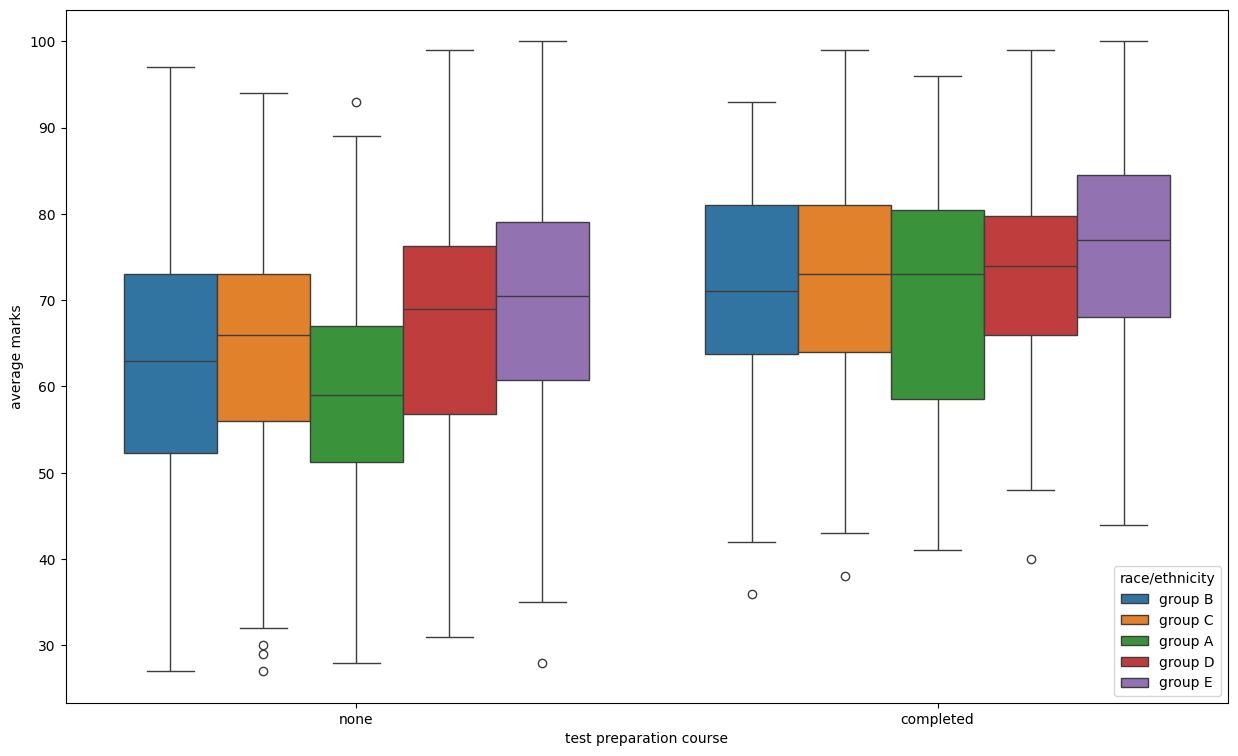

In [64]:
plt.figure(figsize = (15,9))
sns.boxplot(data = df, x = 'test preparation course', y = 'average marks', hue = 'race/ethnicity');